# Gradient Boosting Machine Learning Model

## Reason this model was chosen:
Scikit-learn's gradient boosting binary classification model was chosen. This is a supervised machine learning technique that is based on ensemble learning. This model was chosen since it is a powerful technique to build predictive models for classification. The "boosting" ensemble learning method has to do with how the decision trees (weak learners) are sequentially built, converting the weak learners into strong learners, while reducing variance in the process. This model is also useful for reducing bias.

## How model will be trained:

The following steps will be taken to train model:

1) The preprocessed data is split into a training and testing dataset using scikit-learn's functionality.

2) The data will be scaled to have a mean of 0 and standard deviation of 1 using sci-kit learn's functionality.

3) An instance of scikit-learn's gradient boosting model will be created and trained with the training features and target.

## To improve the model's accuracy, the following steps can/will be taken:

* Oversampling the target vector using imbalanced-learn's RandomOverSampler since there are much more non-stroke patients in dataset than stroke patients or using imbalanced-learn's SMOTEENN combination sampler on input data.

* Testing different learning rates for the gradient boosting model.

* Testing different numbers of boosting stages (n_estimators).

* Altering other hyperparameters of the model.

* Altering the dataset by binning features or removing features.

## How the gradient boosting model works:

This is a supervised machine learning technique that is based on ensemble learning. The "boosting" ensemble learning method has to do with how the decision trees (weak learners) are sequentially built, converting the weak learners into stronger learners in each iteration, while reducing variance in the process.

## Explanation of the gradient boosting model's limitations and benefits:

This model was chosen since it is a powerful technique to build predictive models for binary classification.

The "boosting" ensemble learning method has to do with how the decision trees (weak learners) of features are sequentially built, converting the weak learners into strong learners, while reducing variance in the process. This model is also beneficial in that it reduces bias well.

One of the limitations of using the gradient boosting model is that it does not handle outliers as well as other models and it is prone to overfitting, so different parameters must be tested to create a reliable model.

In [1]:
# import necessary dependencies
from path import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# import dependencies for training, testing, scaling, and model creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# import dependencies for model optimization and evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [2]:
# import cleaned and preprocessed dataset
path = Path("../resources/healthcare-dataset-stroke-data.csv")
stroke_df = pd.read_csv(path)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#  Get a list of all columns within the DataFrame.
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
# Check the datatypes of your columns and other dataframe features.
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# remove unnecessary columns that would not contribute to machine learning model
stroke_df = stroke_df.drop(labels="id", axis=1)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#obtain average bmi
avg_bmi = stroke_df['bmi'].mean()
print(avg_bmi)

28.893236911794673


In [7]:
# fill all null values in 'bmi' column with average bmi
stroke_df['bmi'] = stroke_df['bmi'].fillna(avg_bmi)

In [8]:
# Verify dropped rows
stroke_df.count()

gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  5110
smoking_status       5110
stroke               5110
dtype: int64

In [9]:
# number of unique values in each column
print(stroke_df.nunique())
print('--------------------')
print(stroke_df.dtypes)

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64
--------------------
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [10]:
# Convert these values into numerical ones with the pd.get_dummies() method
stroke_encoded = pd.get_dummies(stroke_df, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])
stroke_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [11]:
# Check the datatypes of your columns.
stroke_encoded.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

In [12]:
# create for loop to convert all dataypes to integer or float datatypes
for column_name, item in stroke_encoded.iteritems():
    if type(item) != int:
        stroke_encoded[column_name] = stroke_encoded[column_name].astype('int64')
    else:
        continue
print(stroke_encoded.dtypes)
print('---------------------')
stroke_encoded.head()

age                               int64
hypertension                      int64
heart_disease                     int64
avg_glucose_level                 int64
bmi                               int64
stroke                            int64
gender_Female                     int64
gender_Male                       int64
gender_Other                      int64
ever_married_No                   int64
ever_married_Yes                  int64
work_type_Govt_job                int64
work_type_Never_worked            int64
work_type_Private                 int64
work_type_Self-employed           int64
work_type_children                int64
Residence_type_Rural              int64
Residence_type_Urban              int64
smoking_status_Unknown            int64
smoking_status_formerly smoked    int64
smoking_status_never smoked       int64
smoking_status_smokes             int64
dtype: object
---------------------


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202,28,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80,0,1,105,32,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171,34,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174,24,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [13]:
# save stroke_df as csv file.
stroke_encoded.to_csv('../resources/clean_stroke_data.csv', index=False)

## Description of preliminary data preprocessing:

### Steps taken:

1) csv dataset was read in a Pandas dataframe.

2) "id" column was dropped since machine learning model cannot learn anything valuable from this.

3) Categorical columns were converted to binary numerical columns using the Pandas get_dummies() function.

4) Columns that were of the "float" data type were converted into integers.

5) Rows with null values were removed.

6) A csv containing data prepared for machine learning model was exported to resources file.

In [14]:
# Display a statistical overview of the DataFrame
stroke_encoded.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.215264,0.097456,0.054012,105.658317,28.430920,0.048728,0.585910,0.413894,0.000196,0.343836,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,22.633866,0.296607,0.226063,45.275290,7.688483,0.215320,0.492612,0.492578,0.013989,0.475034,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.000000,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.000000,32.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.000000,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# check for discrepancy between target vector categories 
stroke_encoded["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [16]:
# create feature and target vector objects, check shapes of both
X = stroke_encoded.drop(columns=["stroke"]).values
y = stroke_encoded["stroke"].values
print(X.shape, y.shape)

(5110, 21) (5110,)


In [17]:
X[:5]

array([[ 67,   0,   1, 228,  36,   0,   1,   0,   0,   1,   0,   0,   1,
          0,   0,   0,   1,   0,   1,   0,   0],
       [ 61,   0,   0, 202,  28,   1,   0,   0,   0,   1,   0,   0,   0,
          1,   0,   1,   0,   0,   0,   1,   0],
       [ 80,   0,   1, 105,  32,   0,   1,   0,   0,   1,   0,   0,   1,
          0,   0,   1,   0,   0,   0,   1,   0],
       [ 49,   0,   0, 171,  34,   1,   0,   0,   0,   1,   0,   0,   1,
          0,   0,   0,   1,   0,   0,   0,   1],
       [ 79,   1,   0, 174,  24,   1,   0,   0,   0,   1,   0,   0,   0,
          1,   0,   1,   0,   0,   0,   1,   0]], dtype=int64)

In [18]:
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Description of preliminary feature engineering and preliminary feature selection, including the decision-making process:

* Any unnecessary features were removed so that the model was not inaccurately skewed. Categorical features were also converted to numerical data and spread out into binary columns using the Pandas get_dummies() function

### The decision-making process was conducted as follows:

* Selecting features that contribute to a more accurate model and contains valuable information.

* Checking if categorical features have many unique values that can be binned (this was not the case since all categorical features had less than 10 unique values).

* Checking the datatype of each feature to see if any are not numerical, since the machine learning model requires numerical features as inputs.

In [19]:
# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3832, 21) (1278, 21) (3832,) (1278,)


In [20]:
# use SMOTEENN combination sampler since the patients with no stroke cases far out-weighs the number of stroke cases
from imblearn.combine import SMOTEENN
from collections import Counter
sme = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = sme.fit_resample(X,y)
print(Counter(y),Counter(y_train_resampled))

Counter({0: 4861, 1: 249}) Counter({1: 4575, 0: 3580})


In [21]:
# # over-sample data since the patients with no stroke cases far out-weighs the number of stroke cases
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter
# ros = RandomOverSampler(random_state=1)

# # NOTE: only oversample training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# print(Counter(y_train))
# print(Counter(y_train_resampled))

In [22]:
# create an instance of the StandardScaler
scaler = StandardScaler()

X_scaler = scaler.fit(X_train_resampled)

X_train_scaled = X_scaler.transform(X_train_resampled)
X_test_scaled = X_scaler.transform(X_test)

#print first two rows of scaled training and testing features
print(
f'{X_train_scaled[:2]}\n \
----------\n \
{X_test_scaled[:2]}'
)

[[-2.21798103 -0.28282398 -0.20209496 -0.41674124 -1.57794769 -0.90190419
   1.50226134 -0.01107426  1.97879049 -1.5079077  -0.25828331 -0.05081098
  -0.94335512 -0.33571262  3.31551611  1.36912941 -0.80942289  2.14140525
  -0.35724951 -0.57683109 -0.31567294]
 [-1.99999363 -0.28282398 -0.20209496 -0.14088098 -1.72914396  1.10876522
  -0.66566314 -0.01107426  1.97879049 -1.5079077  -0.25828331 -0.05081098
   1.06004619 -0.33571262 -0.30161217 -0.73039115  1.23544813  2.14140525
  -0.35724951 -0.57683109 -0.31567294]]
 ----------
 [[ 0.35427029 -0.28282398 -0.20209496 -0.82133629 -0.82196634  1.10876522
  -0.66566314 -0.01107426 -0.50535921  0.66317056  3.87171746 -0.05081098
  -0.94335512 -0.33571262 -0.30161217  1.36912941 -0.80942289  2.14140525
  -0.35724951 -0.57683109 -0.31567294]
 [ 1.13902493  3.53576804 -0.20209496  2.10278245 -0.06598498 -0.90190419
   1.50226134 -0.01107426 -0.50535921  0.66317056 -0.25828331 -0.05081098
  -0.94335512  2.97873822 -0.30161217  1.36912941 -0.80

## Description of how data was split into training and testing sets:

### Steps taken:

* An object for both features and target vector were created.

* sklearn's train_test_split function was used to separate the data into training and testing dataset with a split of 75% training data and 25% testing data. Stratification was applied so there was an equal ratio of the target categories in both training and testing data.

* Data was over-sampled using imbalanced-learn's RandomOverSampler since there was a discrepancy between the target categories i.e. patients that had a stroke made up only 4.3% of the dataset.

* Data was scaled using sklearn's StandardScaler to give features a normalized statistical distribution since the machine learning model would behave better when working with all normalized data.

In [23]:
# create a function that takes implements the X_train_scaled and y_train data, and tests for the best learning rate for the
# first gradient boosting model.

def gb_learning_rates(X_train_scaled, y_train_resampled, X_test_scaled, y_test):
    
    learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
    
    for learning_rate in learning_rates:
        
        # create instance of model
        gb_model = GradientBoostingClassifier(n_estimators=21,
                                             learning_rate=learning_rate,
                                             max_depth=3,
                                             max_features=6,
                                             random_state=None)
                                              
        # train model with training data
        gb_model.fit(X_train_scaled, y_train_resampled)
        
        print(f'Learning Rate: {learning_rate}')
        
        print(f'Mean Accuracy for Training Data: {gb_model.score(X_train_scaled, y_train_resampled):.3f}')
        
        print(f'Mean Accuracy for Testing Data: {gb_model.score(X_test_scaled, y_test):.3f}')
        
        print('--------------------------------')
    
    return

In [24]:
# call function and input arguments which is the intended training and testing data

gb_learning_rates(X_train_scaled, y_train_resampled, X_test_scaled, y_test)

Learning Rate: 0.05
Mean Accuracy for Training Data: 0.879
Mean Accuracy for Testing Data: 0.653
--------------------------------
Learning Rate: 0.1
Mean Accuracy for Training Data: 0.900
Mean Accuracy for Testing Data: 0.712
--------------------------------
Learning Rate: 0.25
Mean Accuracy for Training Data: 0.953
Mean Accuracy for Testing Data: 0.836
--------------------------------
Learning Rate: 0.5
Mean Accuracy for Training Data: 0.969
Mean Accuracy for Testing Data: 0.895
--------------------------------
Learning Rate: 0.75
Mean Accuracy for Training Data: 0.970
Mean Accuracy for Testing Data: 0.902
--------------------------------
Learning Rate: 1
Mean Accuracy for Training Data: 0.972
Mean Accuracy for Testing Data: 0.894
--------------------------------


In [25]:
# create a new model with the highest learning accuracy

# create instance of model
classifier1 = GradientBoostingClassifier(n_estimators=21,
                                             learning_rate=1,
                                             max_depth=3,
                                             max_features=6,
                                             random_state=None)

#train model with training features and target
classifier1.fit(X_train_scaled, y_train_resampled)

# predict target using testing features and make dataframe to compare predictions with actual results
predictions = classifier1.predict(X_test_scaled)

predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_df.sample(50)

,Prediction,Actual
723,0,0
1032,0,0
1167,0,0
19,0,0
300,0,0
324,1,0
946,0,0
820,0,0
1232,0,0
243,0,0


In [26]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8943661971830986


In [27]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual No Stroke", "Actual Stroke"],
    columns=["Predicted No Stroke", "Predicted Stroke"]
)

# Displaying results
display(cm_df)

,Predicted No Stroke,Predicted Stroke
Actual No Stroke,1111,105
Actual Stroke,30,32


In [28]:
precision,recall,fscore,support = precision_recall_fscore_support(y_test, predictions)
print('Order: No Stroke(0), Stroke(1)')
print('precision:  {0}'.format(precision))
print('recall:  {0}'.format(recall))
print('fscore:  {0}'.format(fscore))
print('support:  {0}'.format(support))

Order: No Stroke(0), Stroke(1)
precision:  [0.97370727 0.23357664]
recall:  [0.91365132 0.51612903]
fscore:  [0.9427238  0.32160804]
support:  [1216   62]


Text(0, 0.5, 'Feature Importance Score')

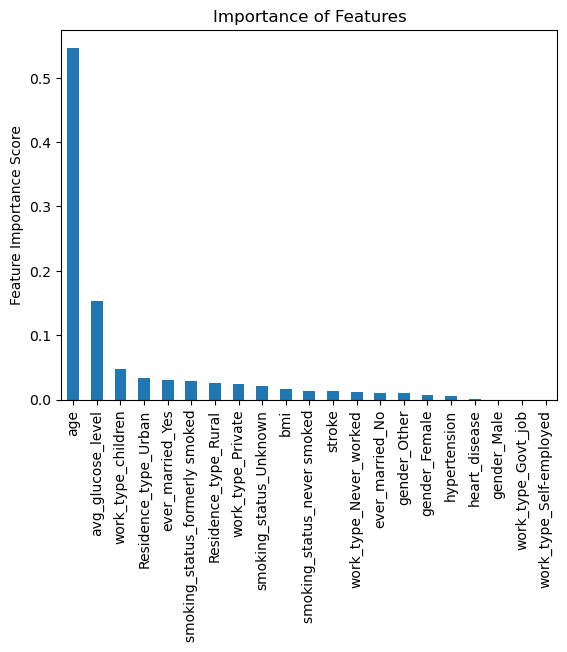

In [29]:
# Feature importance visualization for first model (before optimization)
features = list(stroke_encoded.columns)
feat_imp = pd.Series(classifier1.feature_importances_, features[:21]).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

## Results Before Optimization of Gradient Boosting Model

* The first model was trained using the following hyperparameter variables:
    * Learning rate = 1
    * n_estimators = 21
    * max_depth = 3
    * max_features = 6
    * min_samples_split = 2 (default, constant during optimization)
    * min_samples_leaf = 1 (default, constant during optimization)
    * random_state = None (default, constant during optimization)

* According to the metrics calculated for the first model (see metrics in code above), the following was found:
    * An overall accuracy score was found to be about 89.4%. 
    * The sensitivity for detecting if a patient did not have a stroke was 91.4%.
    * The sensitivity for detecting if a patient did  have a stroke was 51.6%.
    * The predictive value for when the model determined that a patient did not have a stroke was 97.4%.
    * The predictive value for when the model determined that a patient did have a stroke was 23.3%.
    * The top 5 most important features are age, average blood glucose levels, whether the patient is a stay-at-home parent, whether the patient lives in an urban area, and if the patient is married.

* The goal for the optimization is to find better variables for the hyperparameters described above to increase the sensitivity and predictive value for positive stroke cases. 

## Optimization of Model

In [30]:
# new approach to finding the best learning rate, this time along with finding the optimal number of estimators, 
# max depth, and max features
# source: https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

# create a dictionary of learning rates and n_estimators
test_params = {'learning_rate': [1,0.5,0.25,0.1,0.01],
               'n_estimators':[20,25,50,100,250], 
               'max_depth': [2,3,4,5,6], 
               'max_features': [3,4,5,6,7]
              }

# create a tuner object for the GridSeachCV optimizer
tuning = GridSearchCV(estimator=GradientBoostingClassifier(random_state=None), \
                      param_grid=test_params, scoring='average_precision', n_jobs=1, cv=2, verbose=4)

# fit tuning object to training data
tuning.fit(X_train_scaled, y_train_resampled)

Fitting 2 folds for each of 625 candidates, totalling 1250 fits
[CV 1/2] END learning_rate=1, max_depth=2, max_features=3, n_estimators=20;, score=0.988 total time=   0.0s
[CV 2/2] END learning_rate=1, max_depth=2, max_features=3, n_estimators=20;, score=0.994 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=2, max_features=3, n_estimators=25;, score=0.987 total time=   0.0s
[CV 2/2] END learning_rate=1, max_depth=2, max_features=3, n_estimators=25;, score=0.996 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=2, max_features=3, n_estimators=50;, score=0.991 total time=   0.0s
[CV 2/2] END learning_rate=1, max_depth=2, max_features=3, n_estimators=50;, score=0.998 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=2, max_features=3, n_estimators=100;, score=0.991 total time=   0.0s
[CV 2/2] END learning_rate=1, max_depth=2, max_features=3, n_estimators=100;, score=0.999 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=2, max_features=3, n_estimator

[CV 1/2] END learning_rate=1, max_depth=3, max_features=5, n_estimators=100;, score=0.991 total time=   0.1s
[CV 2/2] END learning_rate=1, max_depth=3, max_features=5, n_estimators=100;, score=0.998 total time=   0.1s
[CV 1/2] END learning_rate=1, max_depth=3, max_features=5, n_estimators=250;, score=0.993 total time=   0.4s
[CV 2/2] END learning_rate=1, max_depth=3, max_features=5, n_estimators=250;, score=0.998 total time=   0.4s
[CV 1/2] END learning_rate=1, max_depth=3, max_features=6, n_estimators=20;, score=0.990 total time=   0.0s
[CV 2/2] END learning_rate=1, max_depth=3, max_features=6, n_estimators=20;, score=0.998 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=3, max_features=6, n_estimators=25;, score=0.991 total time=   0.0s
[CV 2/2] END learning_rate=1, max_depth=3, max_features=6, n_estimators=25;, score=0.998 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=3, max_features=6, n_estimators=50;, score=0.992 total time=   0.0s
[CV 2/2] END learning_ra

[CV 2/2] END learning_rate=1, max_depth=5, max_features=3, n_estimators=25;, score=0.993 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=5, max_features=3, n_estimators=50;, score=0.993 total time=   0.0s
[CV 2/2] END learning_rate=1, max_depth=5, max_features=3, n_estimators=50;, score=0.953 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=5, max_features=3, n_estimators=100;, score=0.993 total time=   0.2s
[CV 2/2] END learning_rate=1, max_depth=5, max_features=3, n_estimators=100;, score=0.987 total time=   0.2s
[CV 1/2] END learning_rate=1, max_depth=5, max_features=3, n_estimators=250;, score=0.993 total time=   0.4s
[CV 2/2] END learning_rate=1, max_depth=5, max_features=3, n_estimators=250;, score=0.999 total time=   0.5s
[CV 1/2] END learning_rate=1, max_depth=5, max_features=4, n_estimators=20;, score=0.992 total time=   0.0s
[CV 2/2] END learning_rate=1, max_depth=5, max_features=4, n_estimators=20;, score=0.996 total time=   0.0s
[CV 1/2] END learning_ra

[CV 2/2] END learning_rate=1, max_depth=6, max_features=5, n_estimators=250;, score=1.000 total time=   0.6s
[CV 1/2] END learning_rate=1, max_depth=6, max_features=6, n_estimators=20;, score=0.993 total time=   0.0s
[CV 2/2] END learning_rate=1, max_depth=6, max_features=6, n_estimators=20;, score=0.996 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=6, max_features=6, n_estimators=25;, score=0.988 total time=   0.1s
[CV 2/2] END learning_rate=1, max_depth=6, max_features=6, n_estimators=25;, score=0.996 total time=   0.0s
[CV 1/2] END learning_rate=1, max_depth=6, max_features=6, n_estimators=50;, score=0.994 total time=   0.1s
[CV 2/2] END learning_rate=1, max_depth=6, max_features=6, n_estimators=50;, score=0.998 total time=   0.1s
[CV 1/2] END learning_rate=1, max_depth=6, max_features=6, n_estimators=100;, score=0.994 total time=   0.2s
[CV 2/2] END learning_rate=1, max_depth=6, max_features=6, n_estimators=100;, score=0.996 total time=   0.4s
[CV 1/2] END learning_rat

[CV 1/2] END learning_rate=0.5, max_depth=3, max_features=3, n_estimators=50;, score=0.991 total time=   0.0s
[CV 2/2] END learning_rate=0.5, max_depth=3, max_features=3, n_estimators=50;, score=0.999 total time=   0.0s
[CV 1/2] END learning_rate=0.5, max_depth=3, max_features=3, n_estimators=100;, score=0.992 total time=   0.1s
[CV 2/2] END learning_rate=0.5, max_depth=3, max_features=3, n_estimators=100;, score=0.999 total time=   0.1s
[CV 1/2] END learning_rate=0.5, max_depth=3, max_features=3, n_estimators=250;, score=0.992 total time=   0.3s
[CV 2/2] END learning_rate=0.5, max_depth=3, max_features=3, n_estimators=250;, score=0.999 total time=   0.3s
[CV 1/2] END learning_rate=0.5, max_depth=3, max_features=4, n_estimators=20;, score=0.991 total time=   0.0s
[CV 2/2] END learning_rate=0.5, max_depth=3, max_features=4, n_estimators=20;, score=0.996 total time=   0.0s
[CV 1/2] END learning_rate=0.5, max_depth=3, max_features=4, n_estimators=25;, score=0.991 total time=   0.0s
[CV 2/

[CV 2/2] END learning_rate=0.5, max_depth=4, max_features=5, n_estimators=250;, score=0.999 total time=   0.5s
[CV 1/2] END learning_rate=0.5, max_depth=4, max_features=6, n_estimators=20;, score=0.991 total time=   0.0s
[CV 2/2] END learning_rate=0.5, max_depth=4, max_features=6, n_estimators=20;, score=0.999 total time=   0.0s
[CV 1/2] END learning_rate=0.5, max_depth=4, max_features=6, n_estimators=25;, score=0.992 total time=   0.0s
[CV 2/2] END learning_rate=0.5, max_depth=4, max_features=6, n_estimators=25;, score=0.999 total time=   0.0s
[CV 1/2] END learning_rate=0.5, max_depth=4, max_features=6, n_estimators=50;, score=0.993 total time=   0.0s
[CV 2/2] END learning_rate=0.5, max_depth=4, max_features=6, n_estimators=50;, score=0.999 total time=   0.0s
[CV 1/2] END learning_rate=0.5, max_depth=4, max_features=6, n_estimators=100;, score=0.994 total time=   0.1s
[CV 2/2] END learning_rate=0.5, max_depth=4, max_features=6, n_estimators=100;, score=1.000 total time=   0.1s
[CV 1/2

[CV 1/2] END learning_rate=0.5, max_depth=6, max_features=3, n_estimators=50;, score=0.994 total time=   0.1s
[CV 2/2] END learning_rate=0.5, max_depth=6, max_features=3, n_estimators=50;, score=0.999 total time=   0.1s
[CV 1/2] END learning_rate=0.5, max_depth=6, max_features=3, n_estimators=100;, score=0.995 total time=   0.3s
[CV 2/2] END learning_rate=0.5, max_depth=6, max_features=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 1/2] END learning_rate=0.5, max_depth=6, max_features=3, n_estimators=250;, score=0.994 total time=   0.6s
[CV 2/2] END learning_rate=0.5, max_depth=6, max_features=3, n_estimators=250;, score=0.999 total time=   0.7s
[CV 1/2] END learning_rate=0.5, max_depth=6, max_features=4, n_estimators=20;, score=0.993 total time=   0.0s
[CV 2/2] END learning_rate=0.5, max_depth=6, max_features=4, n_estimators=20;, score=0.999 total time=   0.0s
[CV 1/2] END learning_rate=0.5, max_depth=6, max_features=4, n_estimators=25;, score=0.993 total time=   0.0s
[CV 2/

[CV 1/2] END learning_rate=0.25, max_depth=2, max_features=5, n_estimators=250;, score=0.992 total time=   0.2s
[CV 2/2] END learning_rate=0.25, max_depth=2, max_features=5, n_estimators=250;, score=0.999 total time=   0.3s
[CV 1/2] END learning_rate=0.25, max_depth=2, max_features=6, n_estimators=20;, score=0.981 total time=   0.0s
[CV 2/2] END learning_rate=0.25, max_depth=2, max_features=6, n_estimators=20;, score=0.987 total time=   0.0s
[CV 1/2] END learning_rate=0.25, max_depth=2, max_features=6, n_estimators=25;, score=0.985 total time=   0.0s
[CV 2/2] END learning_rate=0.25, max_depth=2, max_features=6, n_estimators=25;, score=0.989 total time=   0.0s
[CV 1/2] END learning_rate=0.25, max_depth=2, max_features=6, n_estimators=50;, score=0.990 total time=   0.0s
[CV 2/2] END learning_rate=0.25, max_depth=2, max_features=6, n_estimators=50;, score=0.996 total time=   0.0s
[CV 1/2] END learning_rate=0.25, max_depth=2, max_features=6, n_estimators=100;, score=0.992 total time=   0.0

[CV 1/2] END learning_rate=0.25, max_depth=4, max_features=3, n_estimators=50;, score=0.992 total time=   0.0s
[CV 2/2] END learning_rate=0.25, max_depth=4, max_features=3, n_estimators=50;, score=0.999 total time=   0.0s
[CV 1/2] END learning_rate=0.25, max_depth=4, max_features=3, n_estimators=100;, score=0.993 total time=   0.1s
[CV 2/2] END learning_rate=0.25, max_depth=4, max_features=3, n_estimators=100;, score=1.000 total time=   0.1s
[CV 1/2] END learning_rate=0.25, max_depth=4, max_features=3, n_estimators=250;, score=0.993 total time=   0.4s
[CV 2/2] END learning_rate=0.25, max_depth=4, max_features=3, n_estimators=250;, score=1.000 total time=   0.4s
[CV 1/2] END learning_rate=0.25, max_depth=4, max_features=4, n_estimators=20;, score=0.990 total time=   0.0s
[CV 2/2] END learning_rate=0.25, max_depth=4, max_features=4, n_estimators=20;, score=0.996 total time=   0.0s
[CV 1/2] END learning_rate=0.25, max_depth=4, max_features=4, n_estimators=25;, score=0.991 total time=   0.

[CV 1/2] END learning_rate=0.25, max_depth=5, max_features=5, n_estimators=250;, score=0.995 total time=   0.9s
[CV 2/2] END learning_rate=0.25, max_depth=5, max_features=5, n_estimators=250;, score=0.999 total time=   0.9s
[CV 1/2] END learning_rate=0.25, max_depth=5, max_features=6, n_estimators=20;, score=0.992 total time=   0.0s
[CV 2/2] END learning_rate=0.25, max_depth=5, max_features=6, n_estimators=20;, score=0.999 total time=   0.0s
[CV 1/2] END learning_rate=0.25, max_depth=5, max_features=6, n_estimators=25;, score=0.993 total time=   0.0s
[CV 2/2] END learning_rate=0.25, max_depth=5, max_features=6, n_estimators=25;, score=0.999 total time=   0.0s
[CV 1/2] END learning_rate=0.25, max_depth=5, max_features=6, n_estimators=50;, score=0.994 total time=   0.1s
[CV 2/2] END learning_rate=0.25, max_depth=5, max_features=6, n_estimators=50;, score=1.000 total time=   0.1s
[CV 1/2] END learning_rate=0.25, max_depth=5, max_features=6, n_estimators=100;, score=0.994 total time=   0.5

[CV 2/2] END learning_rate=0.1, max_depth=2, max_features=3, n_estimators=50;, score=0.987 total time=   0.0s
[CV 1/2] END learning_rate=0.1, max_depth=2, max_features=3, n_estimators=100;, score=0.989 total time=   0.1s
[CV 2/2] END learning_rate=0.1, max_depth=2, max_features=3, n_estimators=100;, score=0.994 total time=   0.1s
[CV 1/2] END learning_rate=0.1, max_depth=2, max_features=3, n_estimators=250;, score=0.992 total time=   0.3s
[CV 2/2] END learning_rate=0.1, max_depth=2, max_features=3, n_estimators=250;, score=0.998 total time=   0.2s
[CV 1/2] END learning_rate=0.1, max_depth=2, max_features=4, n_estimators=20;, score=0.967 total time=   0.0s
[CV 2/2] END learning_rate=0.1, max_depth=2, max_features=4, n_estimators=20;, score=0.976 total time=   0.0s
[CV 1/2] END learning_rate=0.1, max_depth=2, max_features=4, n_estimators=25;, score=0.971 total time=   0.0s
[CV 2/2] END learning_rate=0.1, max_depth=2, max_features=4, n_estimators=25;, score=0.982 total time=   0.0s
[CV 1/

[CV 2/2] END learning_rate=0.1, max_depth=3, max_features=6, n_estimators=25;, score=0.987 total time=   0.0s
[CV 1/2] END learning_rate=0.1, max_depth=3, max_features=6, n_estimators=50;, score=0.989 total time=   0.0s
[CV 2/2] END learning_rate=0.1, max_depth=3, max_features=6, n_estimators=50;, score=0.994 total time=   0.0s
[CV 1/2] END learning_rate=0.1, max_depth=3, max_features=6, n_estimators=100;, score=0.993 total time=   0.2s
[CV 2/2] END learning_rate=0.1, max_depth=3, max_features=6, n_estimators=100;, score=0.998 total time=   0.1s
[CV 1/2] END learning_rate=0.1, max_depth=3, max_features=6, n_estimators=250;, score=0.993 total time=   0.6s
[CV 2/2] END learning_rate=0.1, max_depth=3, max_features=6, n_estimators=250;, score=0.999 total time=   0.4s
[CV 1/2] END learning_rate=0.1, max_depth=3, max_features=7, n_estimators=20;, score=0.976 total time=   0.0s
[CV 2/2] END learning_rate=0.1, max_depth=3, max_features=7, n_estimators=20;, score=0.985 total time=   0.0s
[CV 1/

[CV 1/2] END learning_rate=0.1, max_depth=5, max_features=3, n_estimators=250;, score=0.994 total time=   0.8s
[CV 2/2] END learning_rate=0.1, max_depth=5, max_features=3, n_estimators=250;, score=1.000 total time=   0.9s
[CV 1/2] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=20;, score=0.990 total time=   0.0s
[CV 2/2] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=20;, score=0.995 total time=   0.0s
[CV 1/2] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=25;, score=0.991 total time=   0.0s
[CV 2/2] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=25;, score=0.996 total time=   0.0s
[CV 1/2] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=50;, score=0.993 total time=   0.1s
[CV 2/2] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=50;, score=0.999 total time=   0.2s
[CV 1/2] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=100;, score=0.994 total time=   0.3s
[CV 2/2

[CV 1/2] END learning_rate=0.1, max_depth=6, max_features=6, n_estimators=50;, score=0.994 total time=   0.2s
[CV 2/2] END learning_rate=0.1, max_depth=6, max_features=6, n_estimators=50;, score=0.999 total time=   0.2s
[CV 1/2] END learning_rate=0.1, max_depth=6, max_features=6, n_estimators=100;, score=0.995 total time=   0.4s
[CV 2/2] END learning_rate=0.1, max_depth=6, max_features=6, n_estimators=100;, score=1.000 total time=   0.3s
[CV 1/2] END learning_rate=0.1, max_depth=6, max_features=6, n_estimators=250;, score=0.995 total time=   1.3s
[CV 2/2] END learning_rate=0.1, max_depth=6, max_features=6, n_estimators=250;, score=1.000 total time=   1.3s
[CV 1/2] END learning_rate=0.1, max_depth=6, max_features=7, n_estimators=20;, score=0.992 total time=   0.0s
[CV 2/2] END learning_rate=0.1, max_depth=6, max_features=7, n_estimators=20;, score=0.997 total time=   0.0s
[CV 1/2] END learning_rate=0.1, max_depth=6, max_features=7, n_estimators=25;, score=0.993 total time=   0.1s
[CV 2/

[CV 1/2] END learning_rate=0.01, max_depth=3, max_features=3, n_estimators=250;, score=0.984 total time=   0.4s
[CV 2/2] END learning_rate=0.01, max_depth=3, max_features=3, n_estimators=250;, score=0.988 total time=   0.4s
[CV 1/2] END learning_rate=0.01, max_depth=3, max_features=4, n_estimators=20;, score=0.967 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=3, max_features=4, n_estimators=20;, score=0.971 total time=   0.0s
[CV 1/2] END learning_rate=0.01, max_depth=3, max_features=4, n_estimators=25;, score=0.964 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=3, max_features=4, n_estimators=25;, score=0.971 total time=   0.0s
[CV 1/2] END learning_rate=0.01, max_depth=3, max_features=4, n_estimators=50;, score=0.975 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=3, max_features=4, n_estimators=50;, score=0.979 total time=   0.0s
[CV 1/2] END learning_rate=0.01, max_depth=3, max_features=4, n_estimators=100;, score=0.978 total time=   0.2

[CV 2/2] END learning_rate=0.01, max_depth=4, max_features=6, n_estimators=25;, score=0.977 total time=   0.0s
[CV 1/2] END learning_rate=0.01, max_depth=4, max_features=6, n_estimators=50;, score=0.980 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=4, max_features=6, n_estimators=50;, score=0.983 total time=   0.1s
[CV 1/2] END learning_rate=0.01, max_depth=4, max_features=6, n_estimators=100;, score=0.984 total time=   0.3s
[CV 2/2] END learning_rate=0.01, max_depth=4, max_features=6, n_estimators=100;, score=0.987 total time=   0.2s
[CV 1/2] END learning_rate=0.01, max_depth=4, max_features=6, n_estimators=250;, score=0.989 total time=   0.7s
[CV 2/2] END learning_rate=0.01, max_depth=4, max_features=6, n_estimators=250;, score=0.993 total time=   0.7s
[CV 1/2] END learning_rate=0.01, max_depth=4, max_features=7, n_estimators=20;, score=0.973 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=4, max_features=7, n_estimators=20;, score=0.981 total time=   0.

[CV 2/2] END learning_rate=0.01, max_depth=6, max_features=3, n_estimators=100;, score=0.996 total time=   0.4s
[CV 1/2] END learning_rate=0.01, max_depth=6, max_features=3, n_estimators=250;, score=0.993 total time=   1.1s
[CV 2/2] END learning_rate=0.01, max_depth=6, max_features=3, n_estimators=250;, score=0.998 total time=   0.8s
[CV 1/2] END learning_rate=0.01, max_depth=6, max_features=4, n_estimators=20;, score=0.987 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=6, max_features=4, n_estimators=20;, score=0.994 total time=   0.0s
[CV 1/2] END learning_rate=0.01, max_depth=6, max_features=4, n_estimators=25;, score=0.990 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=6, max_features=4, n_estimators=25;, score=0.994 total time=   0.1s
[CV 1/2] END learning_rate=0.01, max_depth=6, max_features=4, n_estimators=50;, score=0.991 total time=   0.2s
[CV 2/2] END learning_rate=0.01, max_depth=6, max_features=4, n_estimators=50;, score=0.995 total time=   0.2

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [1, 0.5, 0.25, 0.1, 0.01],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6, 7],
                         'n_estimators': [20, 25, 50, 100, 250]},
             scoring='average_precision', verbose=4)

In [31]:
# print best set of hyperparameters
print(tuning.best_params_)

# Mean cross-validated score of the best_estimator
print(tuning.best_score_)

{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 7, 'n_estimators': 250}
0.9976800055417457


* The GridSearchCV found that the following hyperparameters were able to acheive the highest accuracy of 98.95%:
    * Learning rate = 0.1
    * n_estimators = 250
    * max_depth = 6
    * max_features = 7
    * random_state = None (this will remain constant during optimization)

In [32]:
# apply best parameters to new gradient boosting model

# create instance of model
classifier_optimized1 = GradientBoostingClassifier(n_estimators=250,
                                             learning_rate=0.1,
                                             max_depth=6,
                                             max_features=7,
                                             random_state=None)

#train model with training features and target
classifier_optimized1.fit(X_train_scaled, y_train_resampled)

# predict target using testing features and make dataframe to compare predictions with actual results
predictions_opt = classifier_optimized1.predict(X_test_scaled)

predictions_opt_df = pd.DataFrame({"Prediction": predictions_opt, "Actual": y_test})
predictions_opt_df.sample(50)

,Prediction,Actual
77,1,1
859,0,0
517,0,0
659,0,0
141,0,0
72,0,0
752,0,0
775,0,0
739,0,0
1140,0,0


In [33]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_opt)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9444444444444444


In [34]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions_opt)
cm_df = pd.DataFrame(
    cm, index=["Actual No Stroke", "Actual Stroke"],
    columns=["Predicted No Stroke", "Predicted Stroke"]
)

# Displaying results
display(cm_df)

,Predicted No Stroke,Predicted Stroke
Actual No Stroke,1147,69
Actual Stroke,2,60


In [35]:
# Generate classification report
target_names = ["No stroke (0)", "Stroke (1)"]
classification_report = classification_report(y_test, predictions_opt, target_names=target_names)
print(classification_report) 

               precision    recall  f1-score   support

No stroke (0)       1.00      0.94      0.97      1216
   Stroke (1)       0.47      0.97      0.63        62

     accuracy                           0.94      1278
    macro avg       0.73      0.96      0.80      1278
 weighted avg       0.97      0.94      0.95      1278



Text(0, 0.5, 'Feature Importance Score')

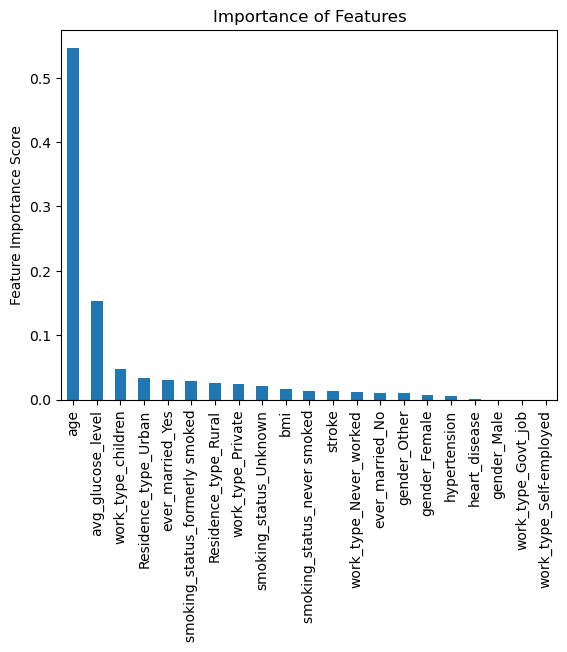

In [36]:
# Feature importance visualization for first model (before optimization)
features = list(stroke_encoded.columns)
feat_imp = pd.Series(classifier1.feature_importances_, features[:21]).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

## Results After Optimization of Gradient Boosting Model

* The optimized model was trained using the following hyperparameter variables:
    * Learning rate = 0.1
    * n_estimators = 250
    * max_depth = 6
    * max_features = 7
    * min_samples_split = 2 (default, constant during optimization)
    * min_samples_leaf = 1 (default, constant during optimization)
    * random_state = None (default, constant during optimization)

* According to the metrics calculated for the optimized model (see metrics in code above), the following was found:
    * An overall accuracy score was found to be about 94.4%. 
    * The sensitivity for detecting if a patient did not have a stroke was 94%.
    * The sensitivity for detecting if a patient did  have a stroke was 97%.
    * The predictive value for when the model determined that a patient did not have a stroke was 100%.
    * The predictive value for when the model determined that a patient did have a stroke was 47%.
    * The top 5 most important features are age, average blood glucose levels, whether the patient is a stay-at-home parent, whether the patient lives in an urban area, and if the patient is married.